In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('/content/Spam_SMS.csv')



In [4]:
# Display first five entries of data

df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Display last five entries of data

df.tail()

,Class,Message
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [6]:
# Display random numbers of data

df.sample(10)

,Class,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3065,ham,Ok. How many should i buy.
3605,ham,Hey morning what you come to ask:-) pa...
1168,ham,Lol now I'm after that hot air balloon!
5487,ham,Also fuck you and your family for going to rho...
4211,ham,No da:)he is stupid da..always sending like th...
1780,spam,"Loan for any purpose £500 - £75,000. Homeowner..."
4198,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
4602,spam,FreeMsg: Txt: CALL to No: 86888 & claim your r...
1300,ham,Great to hear you are settling well. So what's...


In [7]:
# Show the information of data to find any null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Class                 Message
count   5574                    5574
unique     2                    5159
top      ham  Sorry, I'll call later
freq    4827                      30


In [9]:
df.isnull().sum()

,0
Class,0
Message,0


In [10]:
# Replace null values using forward fill method
df_filled = df.fillna(method='ffill')

# Verify the changes
print(df_filled.isnull().sum())

Class      0
Message    0
dtype: int64


<ipython-input-10-12e3b778d458>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


In [11]:
# Show the value of taget column

df['Class'].value_counts()

,count
Class,
ham,4827
spam,747


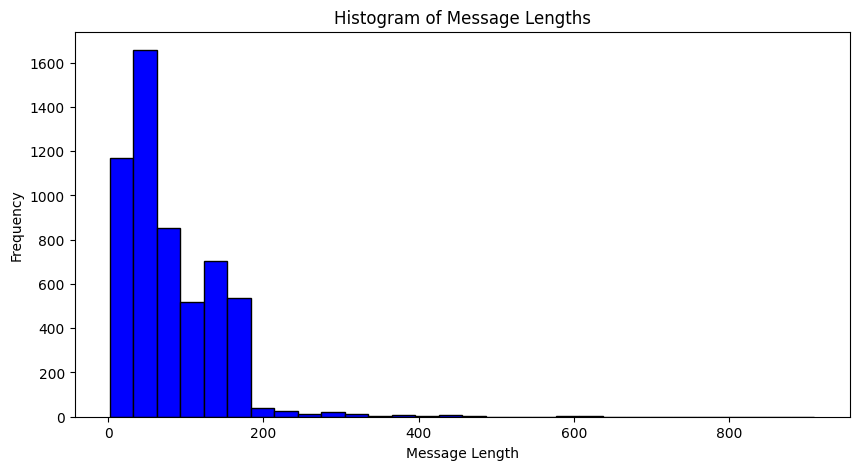

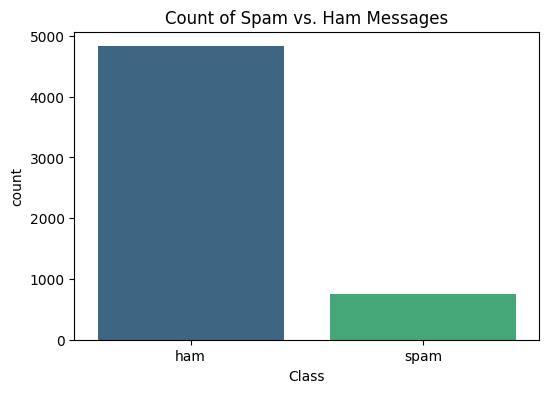

In [12]:
# Plot histogram for message lengths
df['Message_Length'] = df['Message'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(df['Message_Length'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Bar chart for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', hue='Class', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Count of Spam vs. Ham Messages')
plt.show()


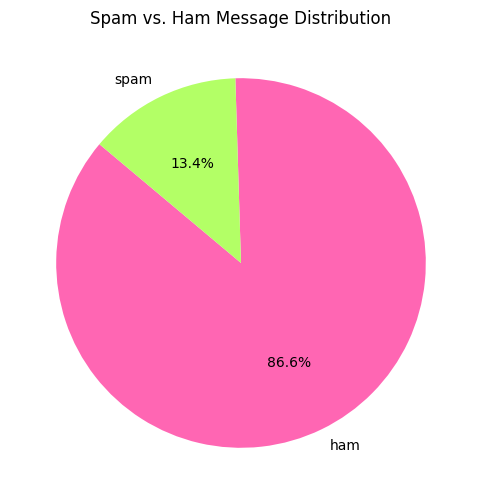

In [13]:
# Pie chart for class distribution
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff66b3','#b3ff66'])
plt.title('Spam vs. Ham Message Distribution')
plt.show()

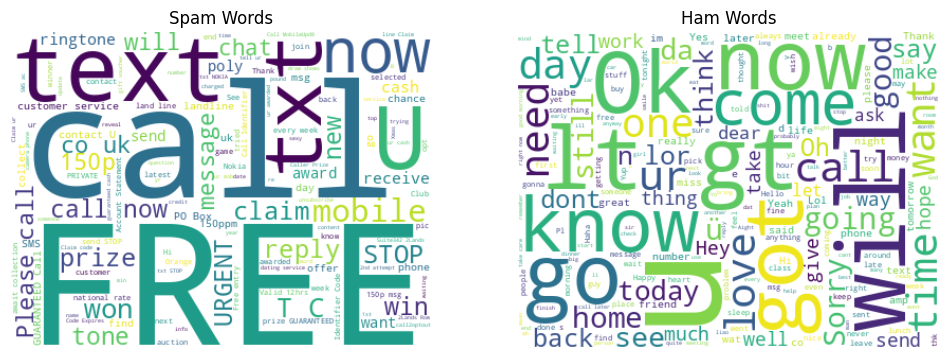

In [14]:
# Generate WordCloud for spam and ham messages
spam_words = ' '.join(df[df['Class'] == 'spam']['Message'])
ham_words = ' '.join(df[df['Class'] == 'ham']['Message'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=400, height=300, background_color='white').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Words')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=400, height=300, background_color='white').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Ham Words')
plt.axis('off')
plt.show()


In [15]:
# Convert text to numerical data using TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['Message'])

# Encoding target variable
y = df['Class'].map({'ham': 0, 'spam': 1})


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Message' is the text data column and 'Class' is the target column (adjust as needed)
X = df['Message']
y = df['Class'].map({'ham': 0, 'spam': 1})  # Encode target column if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Dictionary to store model performances
model_performance = {}



Naive Bayes Accuracy: 0.9749
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.97      0.97      1115



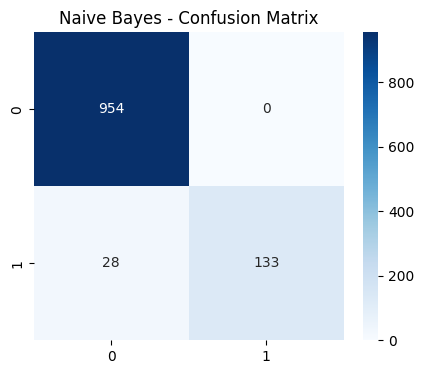

In [17]:
### 1. Train Naive Bayes Model ###
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
model_performance["Naive Bayes"] = nb_accuracy
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix for Naive Bayes
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.9695
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       0.98      0.80      0.88       161

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



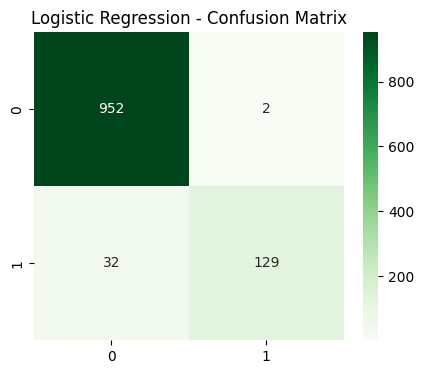

In [18]:
### 2. Train Logistic Regression Model ###
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)
y_pred_lr = logistic_regression_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
model_performance["Logistic Regression"] = lr_accuracy
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix for Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


Support Vector Machine Accuracy: 0.9830
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.97      0.91      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



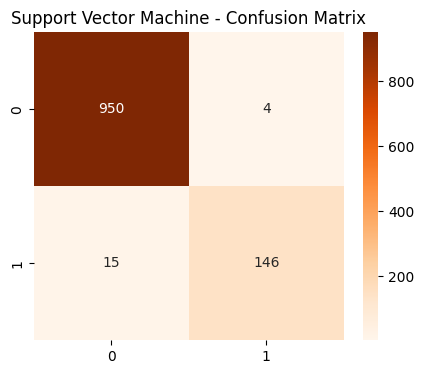

In [19]:
### 3. Train Support Vector Machine Model ###
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_performance["Support Vector Machine"] = svm_accuracy
print(f"\nSupport Vector Machine Accuracy: {svm_accuracy:.4f}")
print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix for SVM
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("Support Vector Machine - Confusion Matrix")
plt.show()



In [20]:
# Print overall model performance
print("\nModel Performance Comparison:", model_performance)


Model Performance Comparison: {'Naive Bayes': 0.9748878923766816, 'Logistic Regression': 0.9695067264573991, 'Support Vector Machine': 0.9829596412556054}


In [21]:
# Find and display the best model based on accuracy
best_model_name = max(model_performance, key=model_performance.get)
best_model_accuracy = model_performance[best_model_name]
print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")



Best Model: Support Vector Machine with an accuracy of 0.9830
